<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.15
    Uninstalling multiprocess-0.70.15:
      Successfully uninstalled multiprocess-0.70.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.14.4 requires dill<0.3.8,>=0.3.0, but you have dill 0.4.0 which is incompatible.


In [23]:
pip install tensorflow

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft, fftfreq
from astropy.timeseries import LombScargle
from PyEMD import EMD
from google.colab import drive
from scipy.signal import lombscargle
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import warnings

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/solana-historical-data.csv')

Mounted at /content/drive


In [3]:
df.head(10)

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2025-06-09,$152.43,$156.44,$149.93,$153.81,$156.44,2.630,"$2,262,193,512",66.65,"$82,118,168,854",2.570
1,2025-06-08,$150.11,$154.85,$148.24,$151.44,$152.55,1.630,"$1,357,439,380",-2.06,"$80,062,391,067",1.670
2,2025-06-07,$148.06,$152.65,$147.26,$149.50,$150.05,1.350,"$1,386,025,930",-30.98,"$78,748,652,657",1.420
3,2025-06-06,$144.54,$151.85,$144.45,$147.25,$148.15,2.500,"$2,008,109,466",-40.09,"$77,645,730,234",2.530
4,2025-06-05,$153.33,$154.28,$142.32,$148.61,$144.50,-5.760,"$3,351,802,624",70.89,"$75,733,219,718",-5.500
5,2025-06-04,$155.36,$157.79,$153.23,$154.93,$153.36,-1.280,"$1,961,376,205",-27.38,"$80,138,541,083",-1.280
6,2025-06-03,$157.01,$162.85,$154.77,$157.49,$155.35,-1.060,"$2,700,758,142",22.06,"$81,174,420,404",-1.070
7,2025-06-02,$157.73,$158.81,$152.09,$156.42,$157.07,-0.417,"$2,212,655,486",19.25,"$82,055,342,592",-0.424
8,2025-06-01,$156.53,$157.76,$151.02,$155.76,$157.74,0.769,"$1,855,530,103",-5.78,"$82,404,488,094",0.687
9,2025-05-31,$156.37,$157.89,$152.55,$155.88,$156.70,0.212,"$1,969,409,537",-37.39,"$81,841,865,961",0.116


In [4]:
# Преобразование даты
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")

In [5]:
# Очистка чисел от символов
df["Закрыть"] = df["Закрыть"].apply(lambda x: float(str(x).replace("$", "").replace(",", "")))

In [6]:
df.head(10)

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
1096,2022-06-09,$38.77,$41.59,$38.53,$39.70,39.90,2.91,"$845,083,513",NaN,"$13,641,597,977",NaN
1095,2022-06-10,$39.85,$40.64,$37.00,$38.63,37.04,-7.05,"$784,475,459",-7.17,"$12,663,454,413",-7.17
1094,2022-06-11,$37.06,$37.79,$33.38,$35.51,33.81,-8.76,"$711,719,673",-9.27,"$11,565,502,324",-8.67
1093,2022-06-12,$33.86,$34.18,$30.71,$32.36,30.71,-9.29,"$959,843,793",34.86,"$10,505,024,841",-9.17
1092,2022-06-13,$30.77,$30.86,$26.18,$28.95,27.97,-9.09,"$1,689,254,223",75.99,"$9,572,858,962",-8.87
1091,2022-06-14,$28.32,$31.47,$26.09,$28.89,29.68,4.78,"$1,547,526,184",-8.39,"$10,156,043,711",6.09
1090,2022-06-15,$29.51,$34.55,$26.90,$31.30,34.25,16.06,"$1,733,142,576",11.99,"$11,719,419,944",15.39
1089,2022-06-16,$34.62,$35.42,$29.76,$32.46,30.02,-13.30,"$1,337,801,466",-22.81,"$10,275,718,520",-12.32
1088,2022-06-17,$29.93,$32.00,$29.36,$30.50,30.70,2.59,"$879,245,729",-34.28,"$10,511,561,827",2.30
1087,2022-06-18,$30.72,$31.84,$27.40,$30.45,31.84,3.68,"$1,238,246,645",40.83,"$10,903,050,376",3.72


In [7]:
# Возьмём первые 50 000 значений ряда
subset = df['Закрыть'].dropna()

# Запускаем ADF-тест
result = adfuller(subset)

print("=== ADF Тест на подмножестве ===")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
for key, value in result[4].items():
    print(f"Критическое значение {key}: {value}")

if result[1] < 0.05:
    print("Ряд стационарен (отклоняем H0)")
else:
    print("Ряд нестационарен (не отклоняем H0)")

=== ADF Тест на подмножестве ===
ADF Statistic: -1.1343911096485357
p-value: 0.7011641467404686
Критическое значение 1%: -3.436336023678866
Критическое значение 5%: -2.8641831050780513
Критическое значение 10%: -2.568177274243656
Ряд нестационарен (не отклоняем H0)


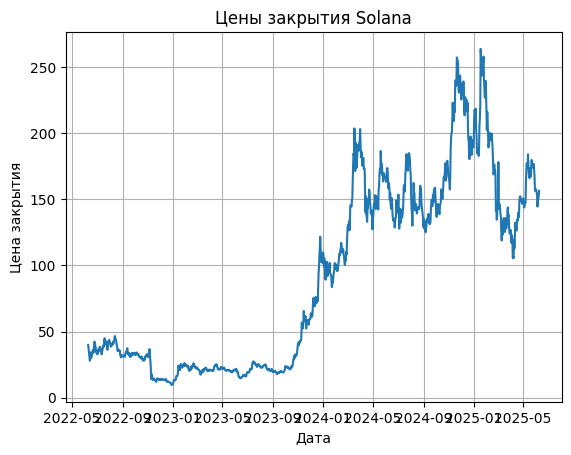

In [8]:
# Построим график ряда
plt.plot(df["Дата"], df["Закрыть"])
plt.title("Цены закрытия Solana")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия")
plt.grid()
plt.show()

In [9]:
# дифференцирование
df["Закрыть_diff"] = df["Закрыть"].diff()

# Удалим первую строку с NaN
df_diff = df.dropna()

In [10]:
result_diff = adfuller(df_diff["Закрыть_diff"])

print("ADF Statistic (diff):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Критическое значение {key}: {value}")

if result_diff[1] < 0.05:
    print("Дифференцированный ряд стационарен (отклоняем H0)")
else:
    print("Дифференцированный ряд всё ещё нестационарен (не отклоняем H0)")

ADF Statistic (diff): -34.63080628775418
p-value: 0.0
Критическое значение 1%: -3.436336023678866
Критическое значение 5%: -2.8641831050780513
Критическое значение 10%: -2.568177274243656
Дифференцированный ряд стационарен (отклоняем H0)


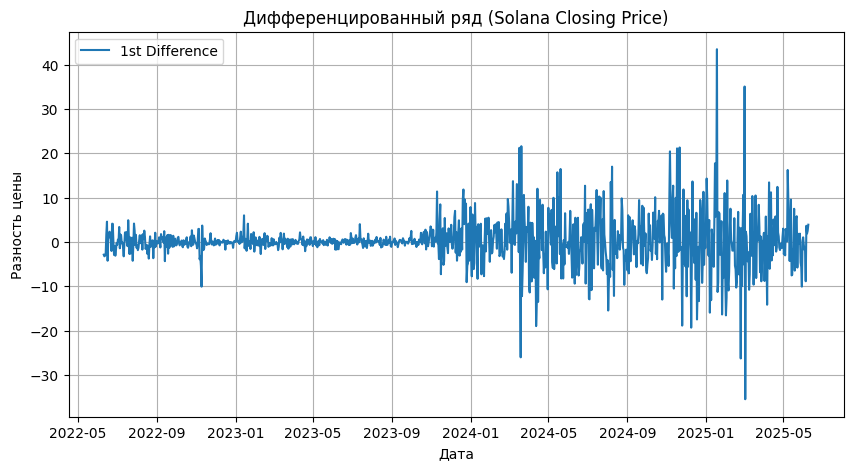

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df_diff["Дата"], df_diff["Закрыть_diff"], label="1st Difference")
plt.title("Дифференцированный ряд (Solana Closing Price)")
plt.xlabel("Дата")
plt.ylabel("Разность цены")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Скользящее среднее (24 часа)
df['RollingMean_24h'] = df['Закрыть_diff'].rolling(window=24).mean()

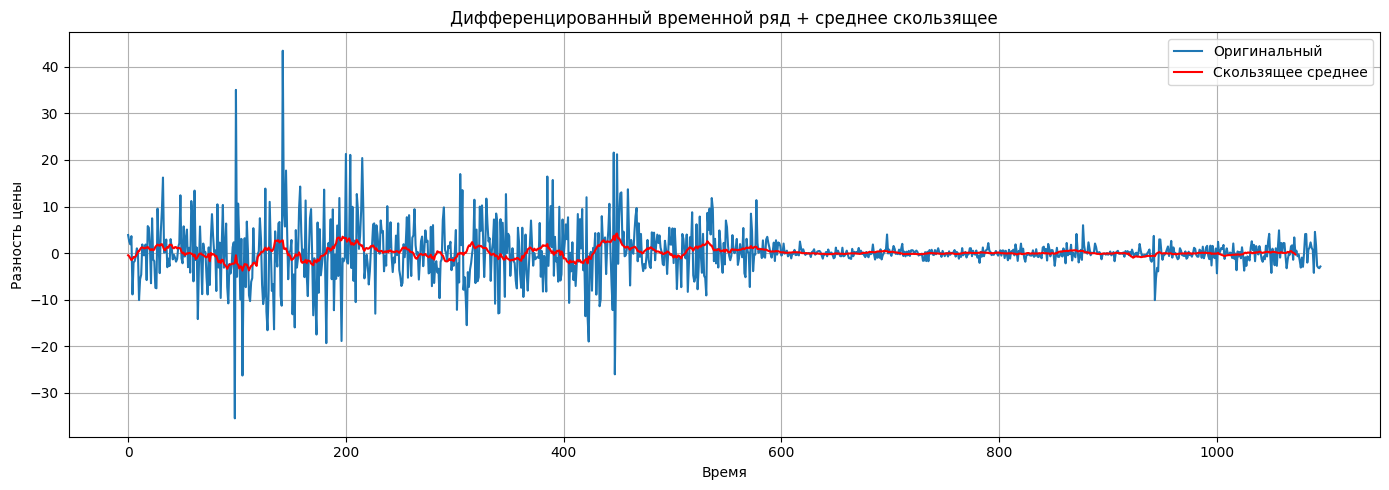

In [13]:
# Оригинальный + скользящее среднее
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Закрыть_diff'], label='Оригинальный')
plt.plot(df.index, df['RollingMean_24h'], label='Скользящее среднее', color='red')
plt.title('Дифференцированный временной ряд + среднее скользящее')
plt.xlabel('Время')
plt.ylabel('Разность цены')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

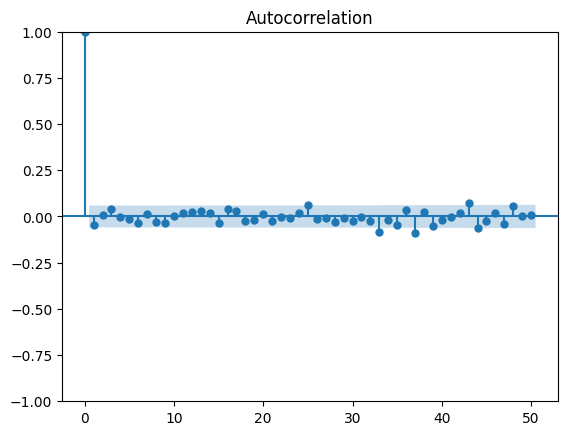

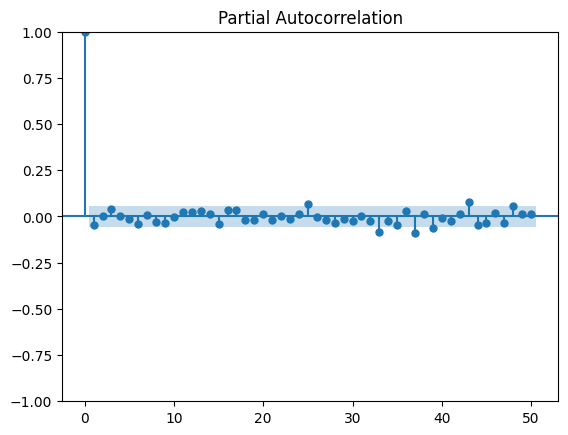

In [14]:
# Временной ряд
plot_acf(df['Закрыть_diff'].dropna(), lags=50)
plt.show()

plot_pacf(df['Закрыть_diff'].dropna(), lags=50)
plt.show()

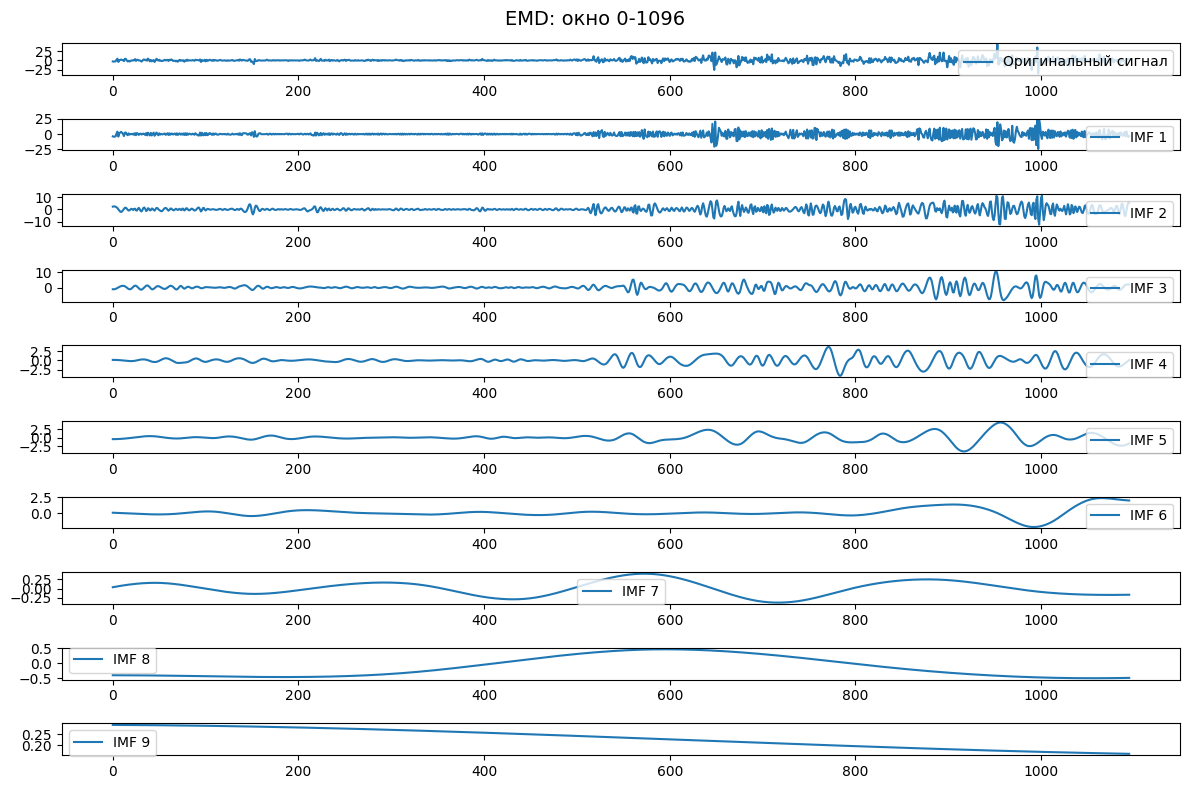

In [15]:
# Предположим, что Global_serius — это 1D-массив или Series
Close_diff = df['Закрыть_diff'].dropna().values

window_size = 5000  # количество точек в одном окне
step = 5000        # шаг окна, можно сделать меньше для перекрытия
total = len(Close_diff)

# Перебираем окна
for start in range(0, total, step):
    end = min(start + window_size, total)
    segment = Close_diff[start:end]

    emd = EMD()
    imfs = emd(segment)

    # Визуализация IMFs для текущего сегмента
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'EMD: окно {start}-{end}', fontsize=14)
    plt.subplot(len(imfs) + 1, 1, 1)
    plt.plot(segment, label='Оригинальный сигнал')
    plt.legend()

    for i, imf in enumerate(imfs):
        plt.subplot(len(imfs) + 1, 1, i + 2)
        plt.plot(imf, label=f'IMF {i + 1}')
        plt.legend()

    plt.tight_layout()
    plt.show()
    break

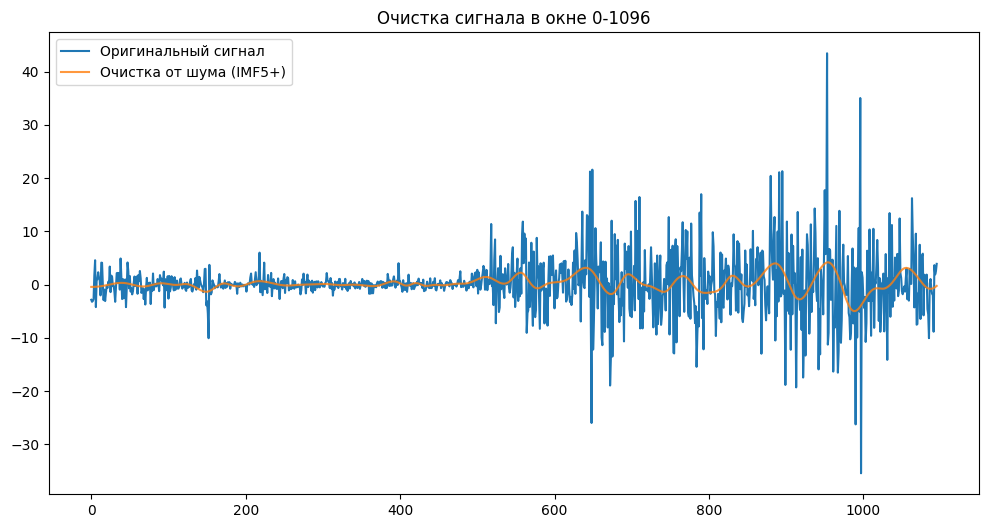

In [16]:
for start in range(0, total, step):
    end = min(start + window_size, total)
    segment = Close_diff[start:end]

    emd = EMD()
    imfs = emd(segment)

    # Проверка, что имфов достаточно
    if len(imfs) <= 4:
        continue  # мало компонент — пропускаем окно

    # Суммируем IMF5 и далее
    cleaned = np.sum(imfs[4:], axis=0)
    cleaned_series = pd.Series(cleaned)

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(segment, label='Оригинальный сигнал')
    plt.plot(cleaned_series, label='Очистка от шума (IMF5+)', alpha=0.8)
    plt.title(f'Очистка сигнала в окне {start}-{end}')
    plt.legend()
    plt.show()



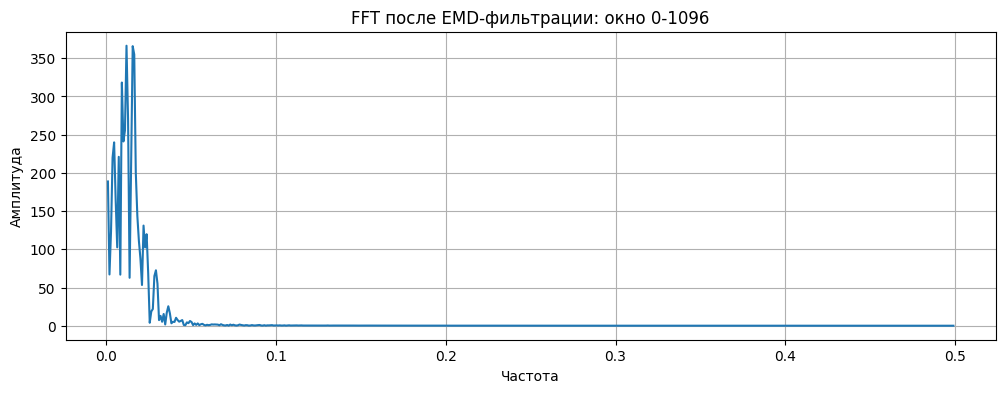

In [17]:
# Цикл по сегментам
for start in range(0, total, step):
    end = min(start + window_size, total)
    segment = Close_diff[start:end]

    emd = EMD()
    imfs = emd(segment)

    # Если IMFs слишком мало, пропускаем
    if len(imfs) <= 4:
        continue

    # Убираем шум — используем IMF5 и выше
    cleaned = np.sum(imfs[4:], axis=0)
    cleaned_series = pd.Series(cleaned)

    # --- FFT на очищенном сигнале ---
    fft_values = np.fft.fft(cleaned)
    freqs = np.fft.fftfreq(len(cleaned))

    # Только положительные частоты
    mask = freqs > 0
    freqs = freqs[mask]
    amplitudes = np.abs(fft_values[mask])

    # Визуализация FFT
    plt.figure(figsize=(12, 4))
    plt.plot(freqs, amplitudes)
    plt.title(f'FFT после EMD-фильтрации: окно {start}-{end}')
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    plt.show()

    # Только первый сегмент анализируем
    break

<h3> ARIMA

In [18]:
# Удаляем пропуски
ts = df['Закрыть_diff'].dropna()

In [19]:
model = ARIMA(ts, order=(1, 0, 1))  # ARIMA(p,d,q)
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Закрыть_diff   No. Observations:                 1096
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3384.694
Date:                Sun, 15 Jun 2025   AIC                           6777.387
Time:                        08:21:37   BIC                           6797.385
Sample:                             0   HQIC                          6784.954
                               - 1096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1062      0.156      0.679      0.497      -0.200       0.413
ar.L1         -0.0812      0.425     -0.191      0.849      -0.915       0.752
ma.L1          0.0348      0.427      0.081      0.9

In [20]:
n_steps = 100  # сколько точек предсказываем
forecast_diff = model_fit.forecast(steps=n_steps)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
# Начнём с последнего значения "Закрыть"
last_actual = df['Закрыть'].iloc[-1]

# К кумулятивной сумме предсказанных разностей прибавим последнее значение
forecast = forecast_diff.cumsum() + last_actual

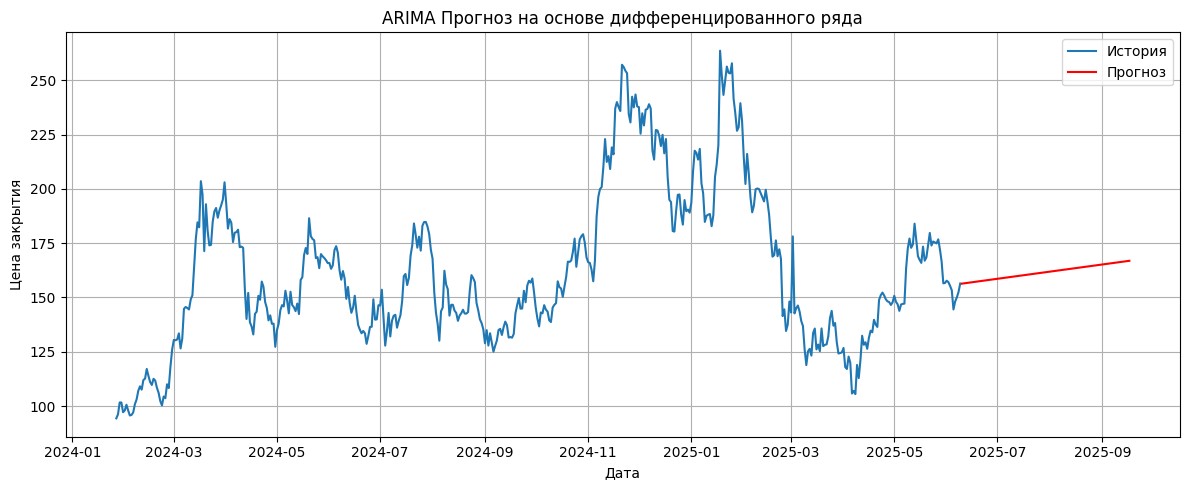

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df['Дата'][-500:], df['Закрыть'][-500:], label='История')
future_dates = pd.date_range(start=df['Дата'].iloc[-1], periods=n_steps + 1, freq='D')[1:]
plt.plot(future_dates, forecast, label='Прогноз', color='red')
plt.title('ARIMA Прогноз на основе дифференцированного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> GRU

In [33]:
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
df["Закрыть"] = df["Закрыть"].apply(lambda x: float(str(x).replace("$", "").replace(",", "")))
df["Закрыть_diff"] = df["Закрыть"].diff()
df = df.dropna()

In [34]:
# Масштабирование
scaler = MinMaxScaler()
scaled_diff = scaler.fit_transform(df[["Закрыть_diff"]])

In [35]:
# Формирование обучающих выборок
window = 30
X, y = [], []
for i in range(window, len(scaled_diff)):
    X.append(scaled_diff[i - window:i, 0])
    y.append(scaled_diff[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [43]:
# GRU модель
model = Sequential()
model.add(GRU(units=128, return_sequences=True, input_shape=(window, 1)))
model.add(GRU(units=64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# Обучение
model.fit(X, y, epochs=10, batch_size=128)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - loss: 0.0052
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0049
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0047
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0052
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0048
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.0054
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - loss: 0.0047
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.0047
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0058
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0057


In [50]:
# Прогнозирование следующих N шагов
N = 100
last_sequence = scaled_diff[-window:]
predicted_diff_scaled = []

for _ in range(N):
    input_seq = last_sequence.reshape(1, window, 1)
    pred = model.predict(input_seq, verbose=0)[0][0]
    predicted_diff_scaled.append(pred)
    last_sequence = np.append(last_sequence[1:], pred)

In [51]:
# Обратное масштабирование и восстановление уровня цены
predicted_diff = scaler.inverse_transform(np.array(predicted_diff_scaled).reshape(-1, 1)).flatten()

In [52]:
# Восстановление цен из дифференциальных значений
last_price = df["Закрыть"].iloc[-1]
predicted_prices = [last_price + predicted_diff[0]]
for i in range(1, len(predicted_diff)):
    predicted_prices.append(predicted_prices[-1] + predicted_diff[i])

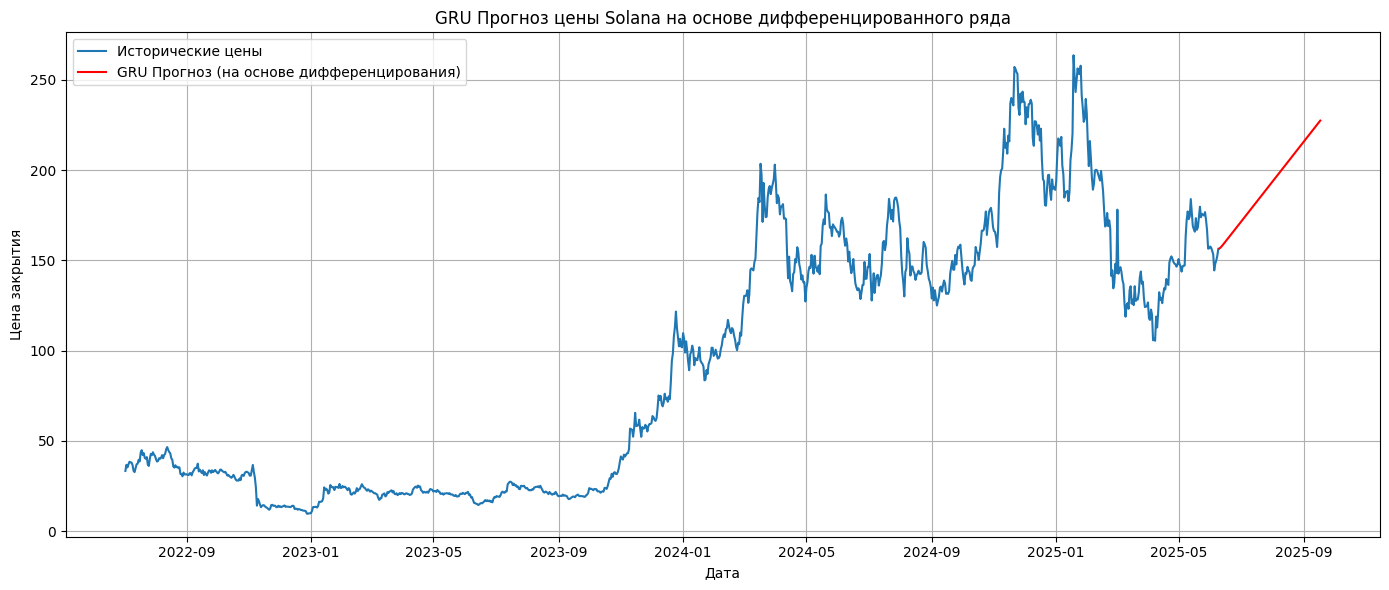

In [53]:
# Построение графика
future_dates = pd.date_range(start=df["Дата"].iloc[-1] + pd.Timedelta(days=1), periods=N)

plt.figure(figsize=(14, 6))
plt.plot(df["Дата"], df["Закрыть"], label="Исторические цены")
plt.plot(future_dates, predicted_prices, color='red', label="GRU Прогноз (на основе дифференцирования)")
plt.title("GRU Прогноз цены Solana на основе дифференцированного ряда")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> LSTM

In [66]:
# Убедимся, что дата и значения числовые
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
df["Закрыть"] = df["Закрыть"].apply(lambda x: float(str(x).replace("$", "").replace(",", "")))
df["Закрыть_diff"] = df["Закрыть"].diff()
df.dropna(inplace=True)


In [59]:
# Масштабируем
scaler = MinMaxScaler()
scaled_diff = scaler.fit_transform(df[["Закрыть_diff"]])

In [67]:
window_size = 60
X, y = [], []

for i in range(window_size, len(scaled_diff)):
    X.append(scaled_diff[i - window_size:i])
    y.append(scaled_diff[i])

X = np.array(X)
y = np.array(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [69]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0775 - val_loss: 0.0091
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0039 - val_loss: 0.0066
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0033 - val_loss: 0.0063
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0027 - val_loss: 0.0061
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0026 - val_loss: 0.0062
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0027 - val_loss: 0.0059
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 9/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0031 - val_loss: 0.0063
Epoch 10/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0026 - val_loss: 0.0060
Epoch 11/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 12/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.

In [70]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Восстановим цены из дифференцированного ряда
last_close_price = df["Закрыть"].iloc[len(X_train) + window_size - 1]
restored_pred = np.cumsum(y_pred_inv) + last_close_price
true_close = df["Закрыть"].iloc[len(X_train) + window_size:].reset_index(drop=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


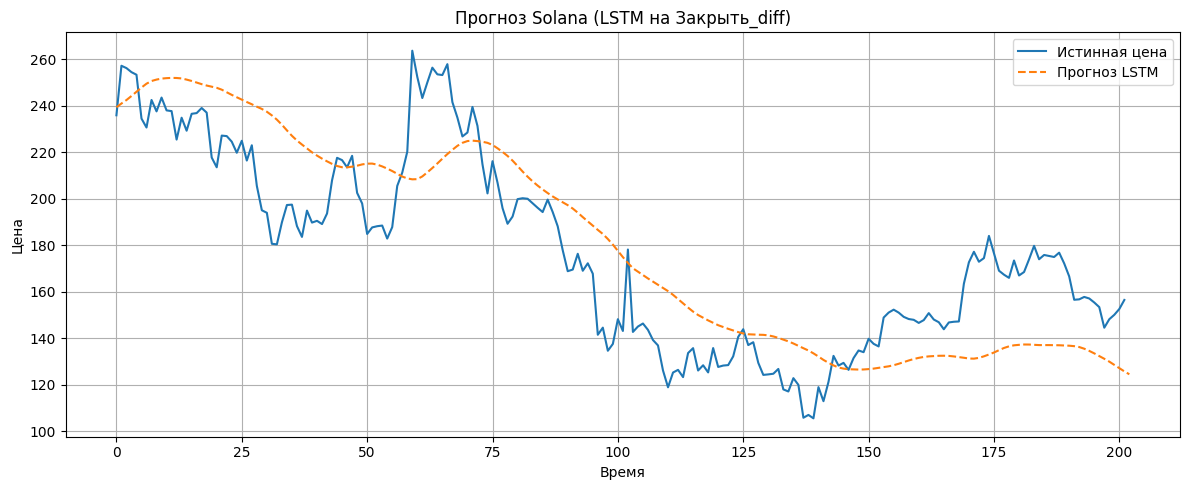

In [71]:
plt.figure(figsize=(12, 5))
plt.plot(true_close.values[:len(restored_pred)], label="Истинная цена")
plt.plot(restored_pred, label="Прогноз LSTM", linestyle='--')
plt.title("Прогноз Solana (LSTM на Закрыть_diff)")
plt.xlabel("Время")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()